# Predicting H1N1 Vaccination Status

**Authors**: Czarina Luna, Weston Shuken, Justin Sohn

January 2022

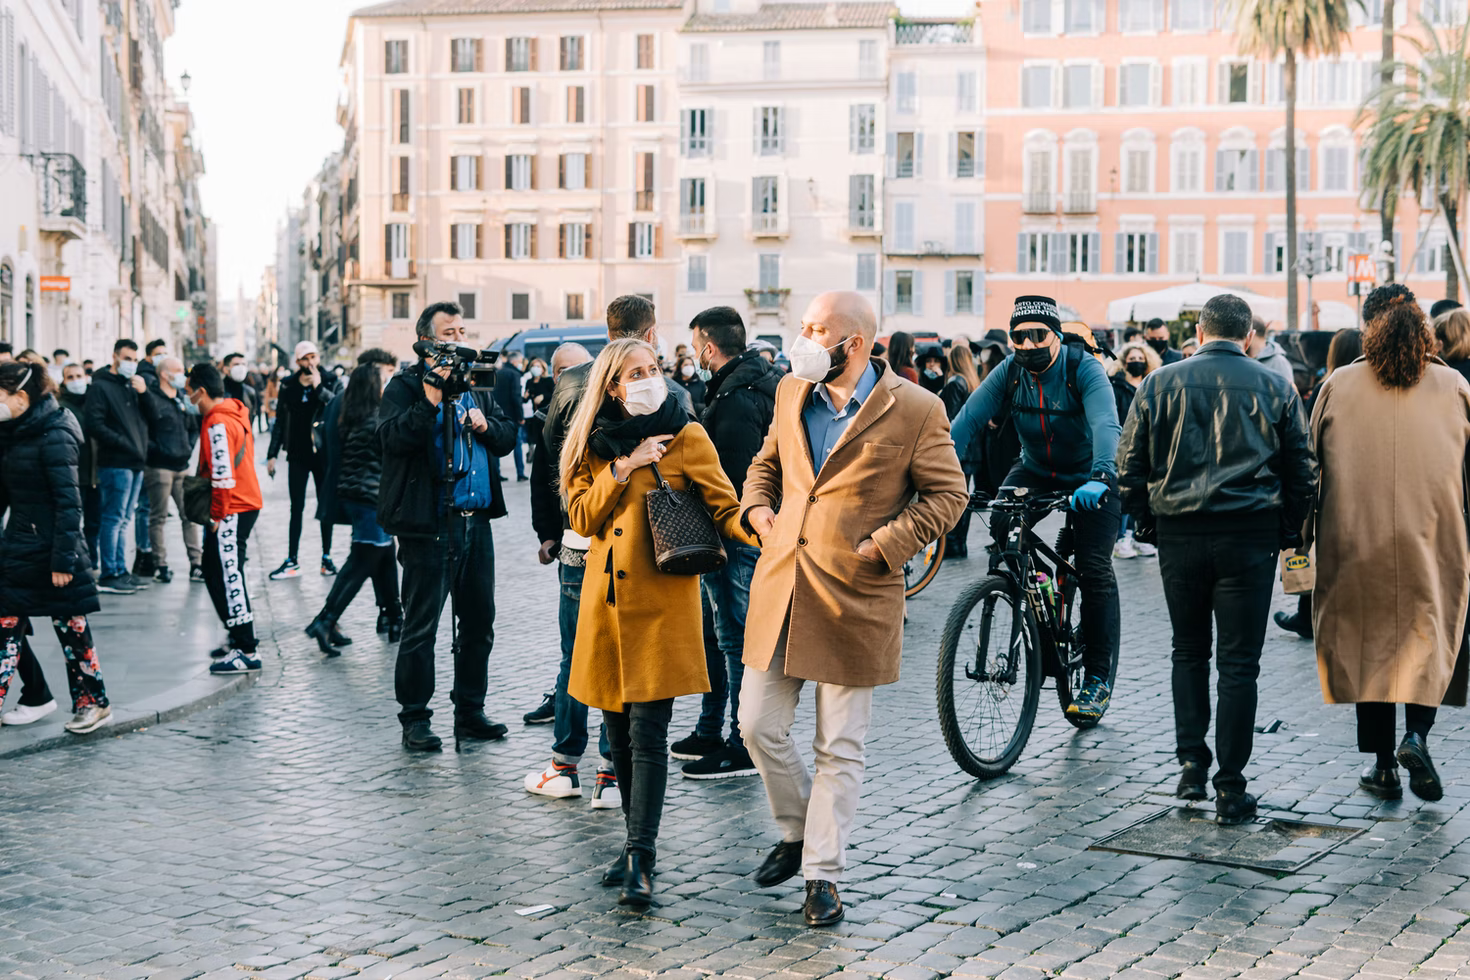

# Table of Contents
* [Overview](#Overview)
* [Business Problem](#Business_Problem)
* [Data Understanding](#Data_Understanding)
* [1. Data Exploration](#Data_Exploration)
* [2. Data Modeling](#Data_Modeling)    
    * [2.1 Baseline Model](#Baseline_Model)
    * [2.2 Machine Learning Pipeline](#Pipeline)
    * [2.3 Hyperparameter Tuning](#Hyperparameter_Tuning)
* [3. Final Model](#Final_Model)
* [4. Test Evaluation](#Test_Evaluation)
* [5. Results](#Results)
* [6. Recommendations](#Recommendations)
* [Next Steps](#Next_Steps)
* [Contact Us](#Contact)

# Overview <a class="anchor" id="Overview"></a>
The United States flu and H1N1 vaccination rate is quite low ([50.2%](https://www.cdc.gov/flu/fluvaxview/coverage-2021estimates.htm)), and this poses a problem to general public health, especially considering the high availability of vaccines and the effectiveness of flu vaccination. Using data from [Driven Data](https://www.drivendata.org/competitions/66/flu-shot-learning/), our team of data scientists developed a classification model predicting the H1N1 vaccination status, to help understand factors related to vaccination patterns. 

# Business Problem <a class="anchor" id="Business_problem"></a>
As a leading public health agency in New York, the NYC Health Department continues to play a critical role in providing vaccinations. Our project, presentation, and machine learning model were created for use by the NYC Health Department. 

<img src="https://cdn.iccaastoria.org/wp-content/uploads/2020/05/13105526/nyc-health-logo.png" alt="NYC_Health_Logo" width="200"/>

The goal is to know what the most effective behaviors of people are to get vaccinated against the H1N1 flu virus and the seasonal flu viruses, knowing the key factors affecting the behavior and the motivations that encourage the citizens to get the vaccine, whether his/her education, age, employer affects their decision to get vaccinated or not. Also, if there is health insurance, physician recommendation, presence of chronic diseases, and working in the health care sector. Vaccination status also may be affected by human behaviors whether one is conservative or not as touching face, meeting others in a large gathering, not wearing the mask, and not washing hands.

The main purpose of this algorithm is classification, meaning that this model should be able to take in attributes of the National 2009 H1N1 Flu and Seasonal Flu Survey dataset that shows whether the survey respondent received the seasonal flu vaccine, or whether the respondent received the H1N1 flu vaccine. The effectiveness of this classification model will be measured by how well it predicts the vaccinated individual based on his/her behavior and motivation characteristics.

## Analysis Questions 
-	Is the age a huge motivation for individual to be vaccinated?
-	Is the knowledge of the importance of the vaccine by the individual effective in his decision?
-	Are male or female more vaccinated?
-	Is the presence of chronical disease a factor pushing to be vaccinated?

# Data Understanding <a class="anchor" id="Data_Understanding"></a>
The data comes from the National 2009 H1N1 Flu Survey (NHFS) and contains answers from respondents regarding demographic information, opinions on vaccinations, and behavioral information.

The data was collected via a list-assisted random-digit-dialing telephone survey of households. The target population was all persons 6 months or older living in the United States. The survey produced estimates of vaccine coverage rates for both the monovalent pH1N1 and trivalent seasonal influenza vaccines. ([Original Source](https://ftp.cdc.gov/pub/health_statistics/NCHS/Datasets/nis/NHFS/NHFSPUF_README.TXT))

# 1. Data Exploration <a class="anchor" id="Data_Exploration"></a>

In [1]:
# Import Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read the data sets and merge labels with features
labels = pd.read_csv('data/training_set_labels.csv')
features = pd.read_csv('data/training_set_features.csv')
data = pd.merge(features, labels, on="respondent_id").drop(columns='respondent_id')

In [3]:
# Assign the target variable for prediction and other target not for prediction
target_variable = 'h1n1_vaccine'
other_target = 'seasonal_vaccine'

In [4]:
# View the first two rows of dataframe
data.head(2)

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0           1.0             0.0                        0.0   
1           3.0             2.0                        0.0   

   behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                   0.0                   0.0                    0.0   
1                   1.0                   0.0                    1.0   

   behavioral_large_gatherings  behavioral_outside_home  \
0                          0.0                      1.0   
1                          0.0                      1.0   

   behavioral_touch_face  doctor_recc_h1n1  ...  rent_or_own  \
0                    1.0               0.0  ...          Own   
1                    1.0               0.0  ...         Rent   

    employment_status  hhs_geo_region                census_msa  \
0  Not in Labor Force        oxchjgsf                   Non-MSA   
1            Employed        bhuqouqj  MSA, Not Principle  City   

   household_adults  household_children  employment_industry  \
0               0.0                 0.0                  NaN   
1               0.0                 0.0             pxcmvdjn   

   employment_occupation  h1n1_vaccine  seasonal_vaccine  
0                    NaN             0                 0  
1               xgwztkwe             0                 1  

[2 rows x 37 columns]

In [5]:
# Look at summary of descriptive statistics on numerical variables
data.describe()

h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count  26615.000000    26591.000000               26636.000000   
mean       1.618486        1.262532                   0.048844   
std        0.910311        0.618149                   0.215545   
min        0.000000        0.000000                   0.000000   
25%        1.000000        1.000000                   0.000000   
50%        2.000000        1.000000                   0.000000   
75%        2.000000        2.000000                   0.000000   
max        3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  doctor_recc_h1n1  ...  \
count           26579.000000      24547.000000  ...   
mean                0.677264          0.220312  ...   
std                 0.467531          0.414466  ...   
min                 0.000000          0.000000  ...   
25%                 0.000000          0.000000  ...   
50%                 1.000000          0.000000  ...   
75%                 1.000000          0.000000  ...   
max                 1.000000          1.000000  ...   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332950          0.753422   
min             1.000000                     1.000000          0.000000   
25%             2.000000                     1.000000          0.000000   
50%             2.000000                     2.000000          1.000000   
75%             4.00

In [6]:
# Look at the dataset's columns, datatypes, and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [7]:
# Create a table to show class imbalance
imbalance_table = pd.DataFrame(data[target_variable].value_counts())
imbalance_table['percent'] = round(data[target_variable].value_counts(normalize=True), 4)*100

imbalance_table['inoculated'] = 'yes'
imbalance_table.at[0, 'inoculated'] = 'no'

imbalance_table

h1n1_vaccine  percent inoculated
0         21033    78.75         no
1          5674    21.25        yes

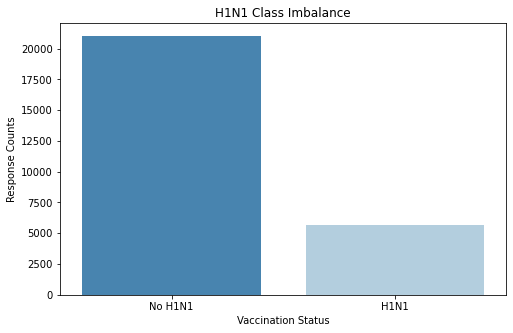

In [8]:
# Visualize the class imbalance of the target variable
no_h1n1 = data[target_variable].value_counts()[0]
yes_h1n1 = data[target_variable].value_counts()[1]

fig, ax = plt.subplots(figsize=(8, 5))

sns.barplot(x=['No H1N1', 'H1N1'], y=[no_h1n1, yes_h1n1], palette="Blues_r", ax=ax)

ax.set_ylabel('Response Counts')
ax.set_xlabel('Vaccination Status')
ax.set_title('H1N1 Class Imbalance')

plt.show()

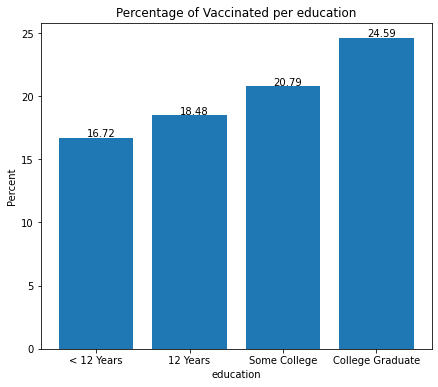

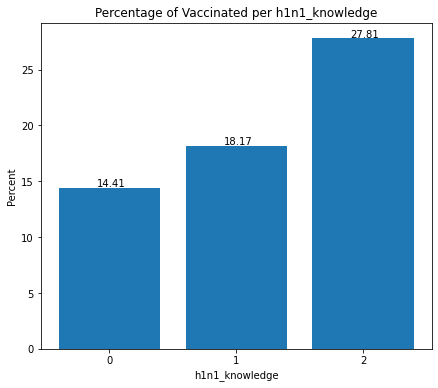

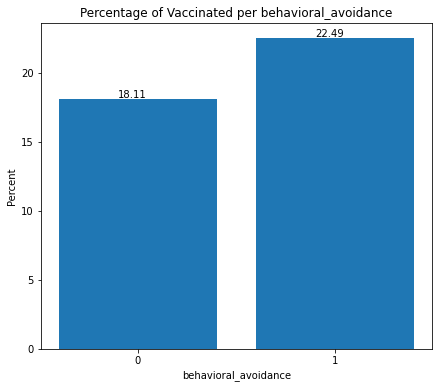

In [9]:
# Create function to plot percentage of vaccinated against features
def plot_percentage(column, df=data, target=target_variable):
    """
    Insert docstring
    """
    ax = plt.subplots(figsize=(7,6))
    
    new_df = df.groupby(column)[target_variable].value_counts(normalize=True).sort_values(ascending=True)
    new_df = new_df.mul(100).rename('Percent').reset_index()

    x = new_df[new_df['h1n1_vaccine'] == 1][column]
    y = new_df[new_df['h1n1_vaccine'] == 1]['Percent']

    plt.xlabel(column)
    plt.ylabel('Percent')
    plt.title(f'Percentage of Vaccinated per {column}')
    plt.xticks(np.arange(0, 4, step=1))

    plt.bar(x=x, height=y, width=0.8)
    
    for index, value in enumerate(y):
        plt.text(index-0.1,value+0.1, str(round(value,2)))
    
    plt.show()

plot_percentage('education')
plot_percentage('h1n1_knowledge')
plot_percentage('behavioral_avoidance')

### EDA Takeaways:
- An issue at stake is the massive amount of NaN or Null values in the data. 
- The target variable `h1n1_vaccine` has an imbalanced class..

# 2. Data Modeling <a class="anchor" id="Data_Modeling"></a>

In [10]:
# Import Python packages and modules to use 
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
plot_confusion_matrix, roc_auc_score, plot_roc_curve, roc_curve, PrecisionRecallDisplay, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

import warnings
warnings.filterwarnings('ignore')

## 2.1 Baseline Model <a class="anchor" id="Baseline_Model"></a>
Our basline model uses logistic regression, drops all NaN/Null values, and uses only numeric features.

In [11]:
# Create function to grab only numerical features
def grab_numeric(df):
    return df.select_dtypes(['float64', 'int64'])

In [12]:
# Create function to split the data into train and test sets, without other target variable
def data_split(df=data, target=target_variable):
    X = df.drop(columns=[target, other_target])
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20211122, stratify=y)
    return X_train, X_test, y_train, y_test

In [13]:
# Create dataframe for baseline model, with only numeric features, and drop missing values
baseline_data = grab_numeric(data).dropna()

# Use the function to split data of baseline dataframe
X_train, X_test, y_train, y_test = data_split(baseline_data)

In [14]:
# Instantiate the baseline classifier and fit to train test
baseline = LogisticRegression(random_state=20211122)

baseline.fit(X_train, y_train)

# Predict on the test set
baseline_pred = baseline.predict(X_test)

In [15]:
# Print the metrics of final model results
print(f"""
Our baseline model's accuracy on the test set is {round(accuracy_score(y_test, baseline_pred), 4)}.
Our baseline model's recall on the test set is {round(recall_score(y_test, baseline_pred), 4)}.
Our baseline model's precision on the test set is {round(precision_score(y_test, baseline_pred), 4)}.
Our baseline model's f1-score on the test is {round(f1_score(y_test, baseline_pred), 4)}.
""")


Our baseline model's accuracy on the test set is 0.8149.
Our baseline model's recall on the test set is 0.5655.
Our baseline model's precision on the test set is 0.753.
Our baseline model's f1-score on the test is 0.6459.



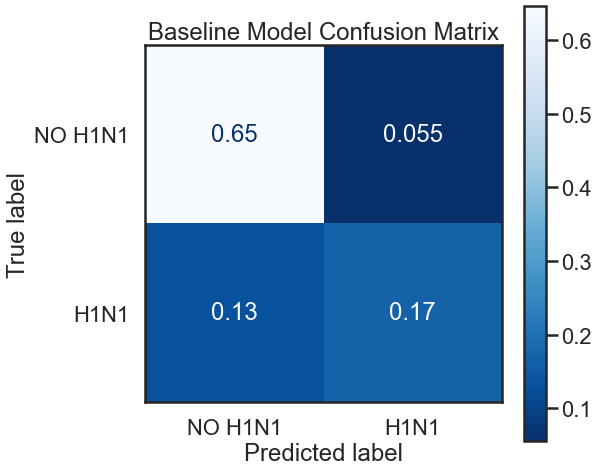

In [16]:
# Plot the confusion matrix of baseline model results
sns.set_theme(style="white", context="poster")

fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(baseline, X_test, y_test, cmap='Blues_r',
                      display_labels=['NO H1N1', 'H1N1'], ax=ax, normalize='all')
plt.title('Baseline Model Confusion Matrix')
plt.grid(False)
plt.show()

## 2.2 Machine Learning Pipeline <a class="anchor" id="Pipeline"></a>
Building a pipeline for an efficient workflow. The pipeline will include catergorical and numeric transformations, standardization of features, mean value for NaN/Null.
The estimators for the pipeline are:
* Logistic Regression
* Decision Tree
* Random Forest
* Extra Trees
* Gradient Boost

In [17]:
# Set up the pipelines for transformers
GrabNumeric = FunctionTransformer(grab_numeric)

numeric_transformer = Pipeline(
    steps=[('grab_num', GrabNumeric), 
           ('num_impute', SimpleImputer(strategy='median', add_indicator=True)), 
           ('scaler', StandardScaler())])

categorical_transformer = Pipeline(
    steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
           ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])

num_features = list(range(0, 21)) + [31, 32]
cat_features = list(range(21, 31)) + [33, 34]

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, num_features),
                  ("cat", categorical_transformer, cat_features)], remainder='passthrough')

sm = SMOTE(sampling_strategy='minority', random_state=20211122)

In [18]:
# Create a dictionary of the baseline models to run
baseline_models = {'LogisticRegression':
                {'classifier': LogisticRegression(random_state=20211122)},
               
               'DecisionTree':
                  {'classifier': DecisionTreeClassifier(random_state=20211122)},
               
               'RandomForest':
                  {'classifier': RandomForestClassifier(random_state=20211122)},
               
               'ExtraTrees':
                  {'classifier': ExtraTreesClassifier(random_state=20211122)},
               
               'GradientBoost':
                  {'classifier': GradientBoostingClassifier(random_state=20211122)}
              }

In [20]:
# Create a function to iterate through dict of models
def run_model(dict_model, type_, df=data, target=target_variable, smote=False):
    """
    This function takes in a dictionary of models, type of models (e.g. default, tuned),
    the dataset, target variable, and option to use SMOTE technique(True/False).
    
    The function returns a metric table of cross validation score, and test scores on Accuracy, Precision, Recall,
    F1, and AUC.
    
    The function will also plot the ROC curve and Precision and Recall curve for all the models.
    """
    X_train, X_test, y_train, y_test = data_split(df, target) #Splitting the data to predictors/target & test/train
    
    pr_dict = {'precision': [], 'recall': [], 'name': []} # Creating empty dict for precision/recall curve plotting
    roc_dict = {'fpr': [], 'tpr': [], 'name': []} # Creating empty dict for ROC curve plotting
    
    metric_table = pd.DataFrame(columns=['Model', 'CV Score', 'Accuracy', 
                                         'Precision', 'Recall', 'F1 Score', 
                                         'AUC Score', 'Type']) # Creating empty table for model scoring
    
    # Iterating through model dictionary
    for name, model in dict_model.items():
        print(f'Running... {name} Model:')
        if smote: # If using smote, we will use imblearn pipline to fit and score
            pipeline = ImPipeline(steps=[('preprocessor', preprocessor),
                                         ('smote', sm),
                                         ('classifier', model['classifier'])])
            pipeline.fit(X_train, y_train)
            
            y_pred = pipeline.predict(X_test)
            y_score = pipeline.predict_proba(X_test)[:,1] 
            
            cv_score = cross_val_score(pipeline, X_train, y_train, cv=3)
            cv_score_mean = round(np.mean(cv_score), 4)
            
            precision_, recall_, _ = precision_recall_curve(y_test, y_score) 
            pr_dict['precision'].append(precision_)
            pr_dict['recall'].append(recall_)
            pr_dict['name'].append(name + 'SMOTE')
            
            fpr, tpr, threshold = roc_curve(y_test, y_score)
            roc_dict['fpr'].append(fpr)
            roc_dict['tpr'].append(tpr)
            roc_dict['name'].append(name + 'SMOTE')
            
        else: # If not using smote, we will use our preprocessor pipline to fit/transform, and our model dict to fit/score
            X_train_processed = preprocessor.fit_transform(X_train)
            X_test_processed = preprocessor.transform(X_test)
            
            model['classifier'].fit(X_train_processed, y_train)
            y_pred = model['classifier'].predict(X_test_processed)
            y_score = model['classifier'].predict_proba(X_test_processed)[:,1] 
            
            cv_score = cross_val_score(model['classifier'], X_train_processed, y_train, cv=3)
            cv_score_mean = round(np.mean(cv_score), 4)
            
            precision_, recall_, _ = precision_recall_curve(y_test, y_score) 
            pr_dict['precision'].append(precision_)
            pr_dict['recall'].append(recall_)
            pr_dict['name'].append(name)
            
            fpr, tpr, threshold = roc_curve(y_test, y_score)
            roc_dict['fpr'].append(fpr)
            roc_dict['tpr'].append(tpr)
            roc_dict['name'].append(name)
        
        # Scoring
        accuracy, precision, recall, f1, auc_score = accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred)
        
        # Appending Scores to metric table
        metric_table = metric_table.append({'Model': name, 'CV Score': cv_score_mean, 'Accuracy': round(accuracy, 4), 'Precision': round(precision, 4), 
                                            'Recall': round(recall, 4), 'F1 Score': round(f1, 4), 'AUC Score': round(auc_score, 4), 'Type': type_}, ignore_index=True)
        
        print(f'Cross Validation Score: {metric_table.iloc[-1,1]}')
        print(f'Test Accuracy Score: {metric_table.iloc[-1,2]}\n')
    
    # Colors for graphing
    colors = ["aqua", "cornflowerblue", "skyblue", 'darkcyan', 'darkblue']
    
    # Plotting Precision / Recall Curve
    fig, ax = plt.subplots(figsize=(14, 8))
    for i, color in zip(range(len(dict_model)), colors):
        display = PrecisionRecallDisplay(
        recall=pr_dict['recall'][i],
        precision=pr_dict['precision'][i])
    
        display.plot(ax=ax, name=f"{pr_dict['name'][i]}", color=color)
        plt.title('Precision / Recall')
        plt.legend(loc="upper right")
        
    # Plotting ROC Curve  
    fig, ax = plt.subplots(figsize=(14, 8))
    for i, color in zip(range(5), colors):
        plt.plot(
        roc_dict['fpr'][i],
        roc_dict['tpr'][i],
        color=color,
        lw=2,
        label=roc_dict['name'][i])
    plt.plot([0, 1], [0, 1], "k--", lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
            
    return metric_table

Running... LogisticRegression Model:
Cross Validation Score: 0.8491
Test Accuracy Score: 0.8588

Running... DecisionTree Model:
Cross Validation Score: 0.7765
Test Accuracy Score: 0.7712

Running... RandomForest Model:
Cross Validation Score: 0.845
Test Accuracy Score: 0.8576

Running... ExtraTrees Model:
Cross Validation Score: 0.8467
Test Accuracy Score: 0.8559

Running... GradientBoost Model:
Cross Validation Score: 0.8503
Test Accuracy Score: 0.86



Model  CV Score  Accuracy  Precision  Recall  F1 Score  \
0  LogisticRegression    0.8491    0.8588     0.7429  0.5130    0.6069   
1        DecisionTree    0.7765    0.7712     0.4649  0.5081    0.4855   
2        RandomForest    0.8450    0.8576     0.7932  0.4461    0.5710   
3          ExtraTrees    0.8467    0.8559     0.7831  0.4454    0.5678   
4       GradientBoost    0.8503    0.8600     0.7574  0.5018    0.6036   

   AUC Score      Type  
0     0.7326  Baseline  
1     0.6751  Baseline  
2     0.7074  Baseline  
3     0.7061  Baseline  
4     0.7292  Baseline

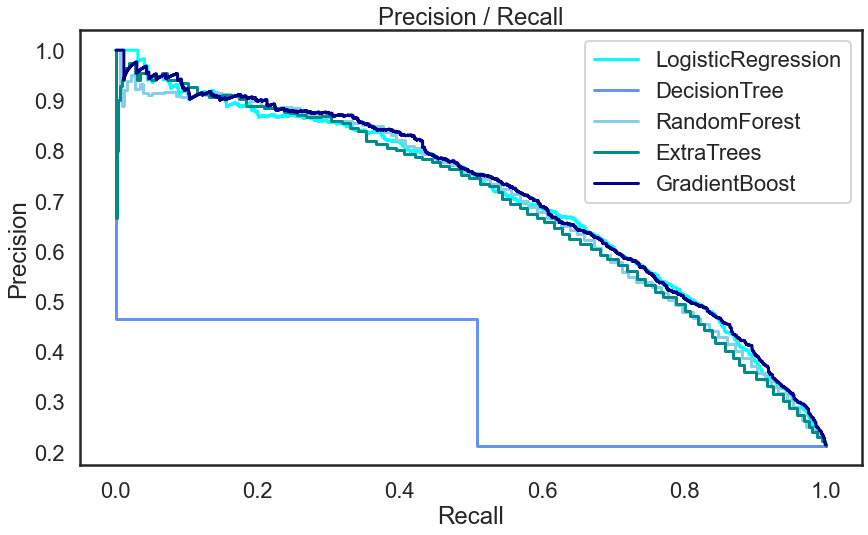

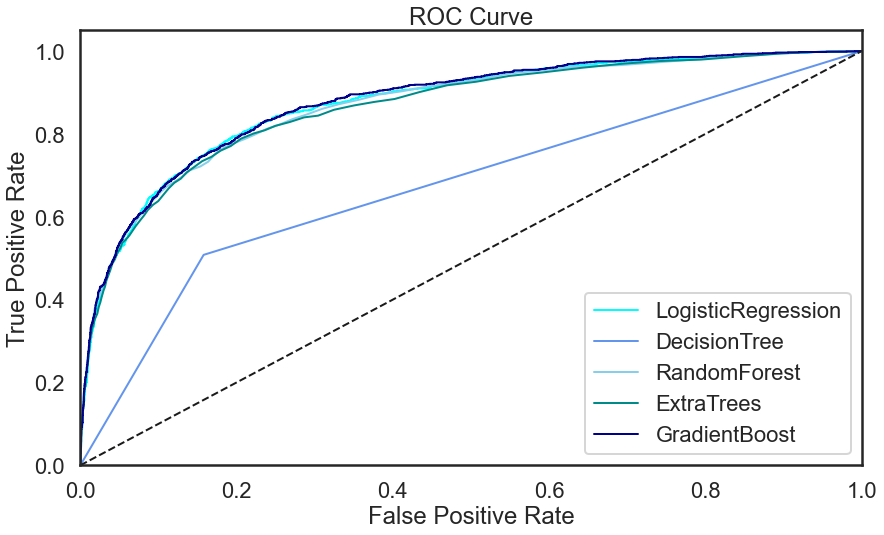

In [21]:
# Run the baseline models and look at the metrics for evaluation
baseline_table = run_model(baseline_models, 'Baseline')
baseline_table

Running... LogisticRegression Model:
Cross Validation Score: 0.7929
Test Accuracy Score: 0.8068

Running... DecisionTree Model:
Cross Validation Score: 0.7711
Test Accuracy Score: 0.7849

Running... RandomForest Model:
Cross Validation Score: 0.8472
Test Accuracy Score: 0.8603

Running... ExtraTrees Model:
Cross Validation Score: 0.848
Test Accuracy Score: 0.8589

Running... GradientBoost Model:
Cross Validation Score: 0.8507
Test Accuracy Score: 0.8609



Model  CV Score  Accuracy  Precision  Recall  F1 Score  \
0  LogisticRegression    0.7929    0.8068     0.5309  0.7801    0.6318   
1        DecisionTree    0.7711    0.7849     0.4943  0.5194    0.5065   
2        RandomForest    0.8472    0.8603     0.7700  0.4884    0.5977   
3          ExtraTrees    0.8480    0.8589     0.7487  0.5060    0.6039   
4       GradientBoost    0.8507    0.8609     0.7191  0.5666    0.6338   

   AUC Score   Type  
0     0.7971  Smote  
1     0.6880  Smote  
2     0.7245  Smote  
3     0.7301  Smote  
4     0.7534  Smote

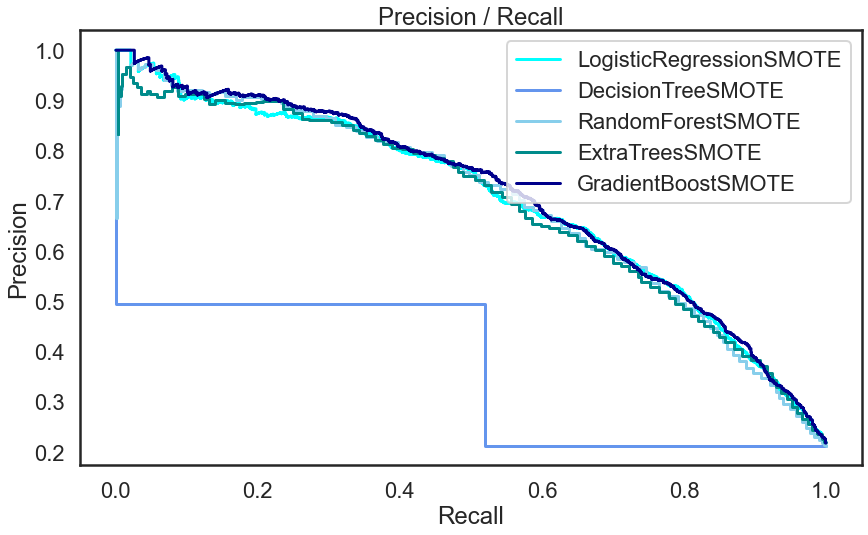

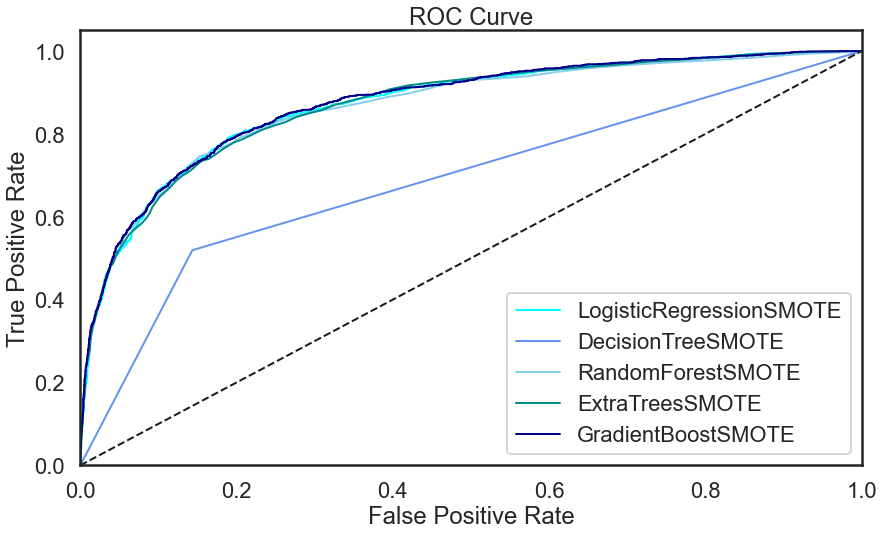

In [22]:
# Run the baseline models but with SMOTE and evaluate the metrics
baseline_smote_table = run_model(baseline_models, 'Smote', smote=True)
baseline_smote_table

## 2.3 Hyperparameter Tuning <a class="anchor" id="Hyperparameter_Tuning"></a>

### >>> EDIT Bringing in stored variables from our GridSearch.iypnb (LINK THIS) file that contain the best params

In [23]:
# Create a function to update dictionary of models with tuned hyperparameters
def tune_hyperparameters(dict_model, classifier, classifier_name, params):
    """
    Insert docstring
    """
    best_params = {}
    for param, values in params.items():
        parameter = param.replace('classifier__', '')
        best_params[parameter] = values
    dict_model[classifier_name]['classifier'] = classifier(**best_params)

In [24]:
# Make a copy of the dictionary of baseline models for tuned models
tuned_models = baseline_models.copy()

#### Optimize Logistic Regression

In [25]:
# Retrieve optimal Linear Regression parameters from the GridSearch notebook ran
%store -r lr_best_params

In [26]:
# Update the baseline Logistic Regression with tuned hyperparameters
tune_hyperparameters(tuned_models, LogisticRegression, 'LogisticRegression', lr_best_params)

#### Optimize Decision Tree

In [27]:
# Retrieve optimal Decision Tree parameters from the GridSearch notebook ran
%store -r dt_best_params

In [28]:
# Update the baseline Logistic Regression with tuned hyperparameters
tune_hyperparameters(tuned_models, DecisionTreeClassifier, 'DecisionTree', dt_best_params)

#### Optimize Random Forest

In [29]:
# Retrieve optimal Random Forest parameters from the GridSearch notebook ran
%store -r rf_best_params

In [30]:
# Update the baseline Random Forest with tuned hyperparameters
tune_hyperparameters(tuned_models, RandomForestClassifier, 'RandomForest', rf_best_params)

#### Optimize Extra Trees

In [31]:
# Retrieve optimal Extra Trees parameters from the GridSearch notebook ran
%store -r et_best_params

In [32]:
# Update the baseline Extra Trees with tuned hyperparameters
tune_hyperparameters(tuned_models, ExtraTreesClassifier, 'ExtraTrees', et_best_params)

#### Optimize Gradient Boost

In [33]:
# Retrieve optimal Gradient Boost parameters from the GridSearch notebook ran
%store -r gb_best_params

In [34]:
# Update the baseline Gradient Boost with tuned hyperparameters
tune_hyperparameters(tuned_models, GradientBoostingClassifier, 'GradientBoost', gb_best_params)

### Tuning SMOTE Models

In [35]:
# Make a copy of the dictionary of baseline models for tuned SMOTE models
tuned_smote_models = baseline_models.copy()

# Retrieve optimal SMOTE models parameters from the GridSearchSMOTE notebook ran
%store -r lr_best_params_smote
%store -r dt_best_params_smote
%store -r rf_best_params_smote
%store -r et_best_params_smote
%store -r gb_best_params_smote

# Update the baseline SMOTE models with tuned typerparameters
tune_hyperparameters(tuned_smote_models, LogisticRegression, 'LogisticRegression', lr_best_params_smote)
tune_hyperparameters(tuned_smote_models, DecisionTreeClassifier, 'DecisionTree', dt_best_params_smote)
tune_hyperparameters(tuned_smote_models, RandomForestClassifier, 'RandomForest', rf_best_params_smote)
tune_hyperparameters(tuned_smote_models, ExtraTreesClassifier, 'ExtraTrees', et_best_params_smote)
tune_hyperparameters(tuned_smote_models, GradientBoostingClassifier, 'GradientBoost', gb_best_smote)

## Training Tuned Models

Running... LogisticRegression Model:
Cross Validation Score: 0.8491
Test Accuracy Score: 0.8588

Running... DecisionTree Model:
Cross Validation Score: 0.8277
Test Accuracy Score: 0.8356

Running... RandomForest Model:
Cross Validation Score: 0.846
Test Accuracy Score: 0.8519

Running... ExtraTrees Model:
Cross Validation Score: 0.8113
Test Accuracy Score: 0.8167

Running... GradientBoost Model:
Cross Validation Score: 0.8121
Test Accuracy Score: 0.8165



Model  CV Score  Accuracy  Precision  Recall  F1 Score  \
0  LogisticRegression    0.8491    0.8588     0.7429  0.5130    0.6069   
1        DecisionTree    0.8277    0.8356     0.6521  0.4848    0.5562   
2        RandomForest    0.8460    0.8519     0.7913  0.4116    0.5415   
3          ExtraTrees    0.8113    0.8167     0.8794  0.1593    0.2697   
4       GradientBoost    0.8121    0.8165     0.8731  0.1600    0.2704   

   AUC Score   Type  
0     0.7326  Tuned  
1     0.7075  Tuned  
2     0.6911  Tuned  
3     0.5767  Tuned  
4     0.5768  Tuned

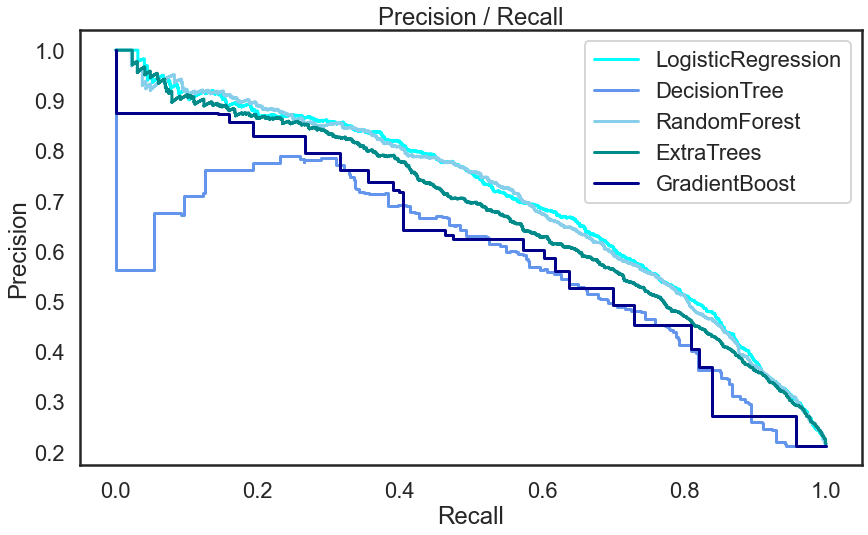

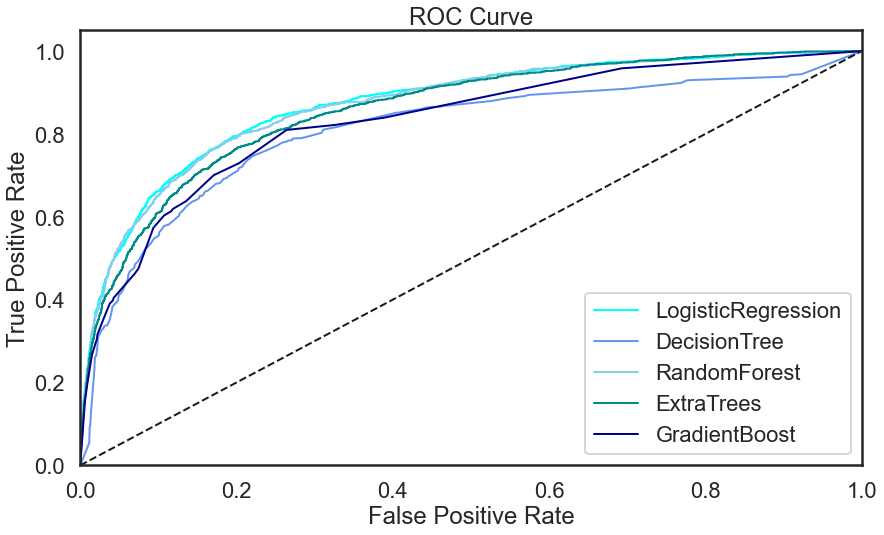

In [36]:
# Run the tuned models and evaluate the metrics
tuned_table = run_model(tuned_models, 'Tuned')
tuned_table

Running... LogisticRegression Model:
Cross Validation Score: 0.8491
Test Accuracy Score: 0.8588

Running... DecisionTree Model:
Cross Validation Score: 0.8282
Test Accuracy Score: 0.836

Running... RandomForest Model:
Cross Validation Score: 0.8472
Test Accuracy Score: 0.8559

Running... ExtraTrees Model:
Cross Validation Score: 0.8095
Test Accuracy Score: 0.8061

Running... GradientBoost Model:
Cross Validation Score: 0.8121
Test Accuracy Score: 0.8165



Model  CV Score  Accuracy  Precision  Recall  F1 Score  \
0  LogisticRegression    0.8491    0.8588     0.7429  0.5130    0.6069   
1        DecisionTree    0.8282    0.8360     0.6525  0.4884    0.5586   
2        RandomForest    0.8472    0.8559     0.8084  0.4221    0.5546   
3          ExtraTrees    0.8095    0.8061     0.8875  0.1001    0.1799   
4       GradientBoost    0.8121    0.8165     0.8731  0.1600    0.2704   

   AUC Score         Type  
0     0.7326  Tuned Smote  
1     0.7091  Tuned Smote  
2     0.6976  Tuned Smote  
3     0.5483  Tuned Smote  
4     0.5768  Tuned Smote

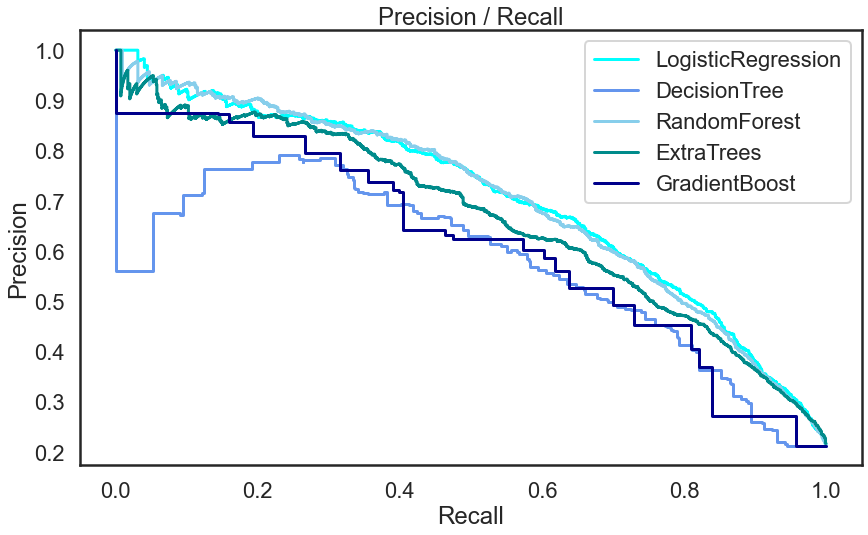

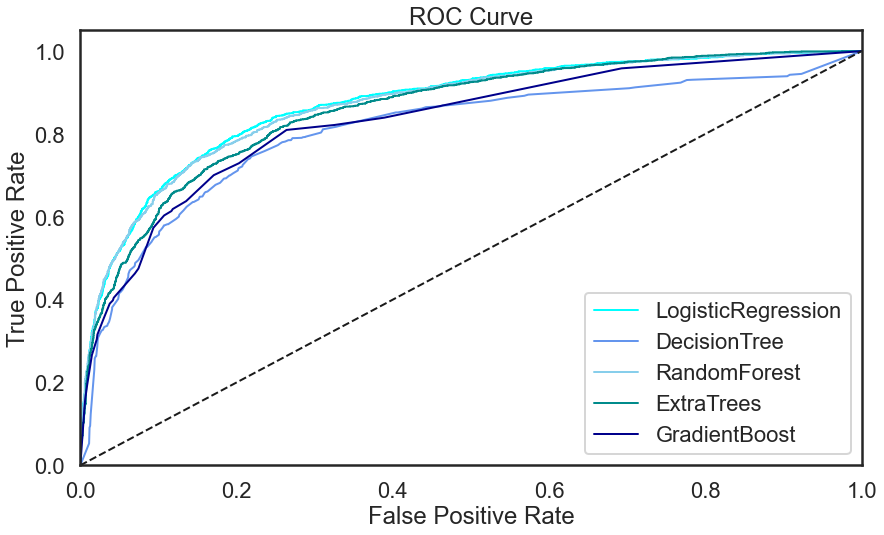

In [37]:
# Run the tuned SMOTE models and evaluate the metrics
tuned_smote_table = run_model(tuned_smote_models, 'Tuned Smote')
tuned_smote_table

In [38]:
# Concatenate all the metrics tables
final_table = pd.concat([baseline_table, baseline_smote_table, tuned_table, tuned_smote_table], ignore_index=True)
final_table['Name'] = final_table['Model'] + ' ' + final_table['Type']
final_table

Model  CV Score  Accuracy  Precision  Recall  F1 Score  \
0   LogisticRegression    0.8491    0.8588     0.7429  0.5130    0.6069   
1         DecisionTree    0.7765    0.7712     0.4649  0.5081    0.4855   
2         RandomForest    0.8450    0.8576     0.7932  0.4461    0.5710   
3           ExtraTrees    0.8467    0.8559     0.7831  0.4454    0.5678   
4        GradientBoost    0.8503    0.8600     0.7574  0.5018    0.6036   
5   LogisticRegression    0.7929    0.8068     0.5309  0.7801    0.6318   
6         DecisionTree    0.7711    0.7849     0.4943  0.5194    0.5065   
7         RandomForest    0.8472    0.8603     0.7700  0.4884    0.5977   
8           ExtraTrees    0.8480    0.8589     0.7487  0.5060    0.6039   
9        GradientBoost    0.8507    0.8609     0.7191  0.5666    0.6338   
10  LogisticRegression    0.8491    0.8588     0.7429  0.5130    0.6069   
11        DecisionTree    0.8277    0.8356     0.6521  0.4848    0.5562   
12        RandomForest    0.8460    0.8519     0.7913  0.4116    0.5415   
13          ExtraTrees    0.8113    0.8167     0.8794  0.1593    0.2697   
14       GradientBoost    0.8121    0.8165     0.8731  0.1600    0.2704   
15  LogisticRegression    0.8491    0.8588     0.7429  0.5130    0.6069   
16        DecisionTree    0.8282    0.8360     0.6525  0.4884    0.5586   
17        RandomForest    0.8472    0.8559     0.8084  0.4221    0.5546   
18          ExtraTrees    0.8095    0.8061     0.8875  0.1001    0.1799   
19       GradientBoost    0.8121    0.8165     0.8731  0.1600    0.2704   

    AUC Score         Type                            Name  
0      0.7326     Baseline     LogisticRegression Baseline  
1      0.6751     Baseline           DecisionTree Baseline  
2      0.7074     Baseline           RandomForest Baseline  
3      0.7061     Baseline             ExtraTrees Baseline  
4      0.7292     Baseline          GradientBoost Baseline  
5      0.7971        Smote        LogisticRegression Smote  
6      0.6880        Smote              DecisionTree Smote  
7      0.7245        Smote              RandomForest Smote  
8      0.7301        Smote                ExtraTrees Smote  
9      0.7534        Smote             GradientBoost Smote  
10     0.7326        Tuned        LogisticRegression Tuned  
11     0.7075        Tuned              DecisionTree Tuned  
12     0.6911        Tuned              RandomForest Tuned  
13     0.5767        Tuned                ExtraTrees Tuned  
14     0.5768        Tuned             GradientBoost Tuned  
15     0.7326  Tuned Smote  LogisticRegression Tuned Smote  
16     0.7091  Tuned Smote        DecisionTree Tuned Smote  
17     0.6976  Tuned Smote        RandomForest Tuned Smote  
18     0.5483  Tuned Smote          ExtraTrees Tuned Smote  
19     0.5768  Tuned Smote       GradientBoost Tuned Smote

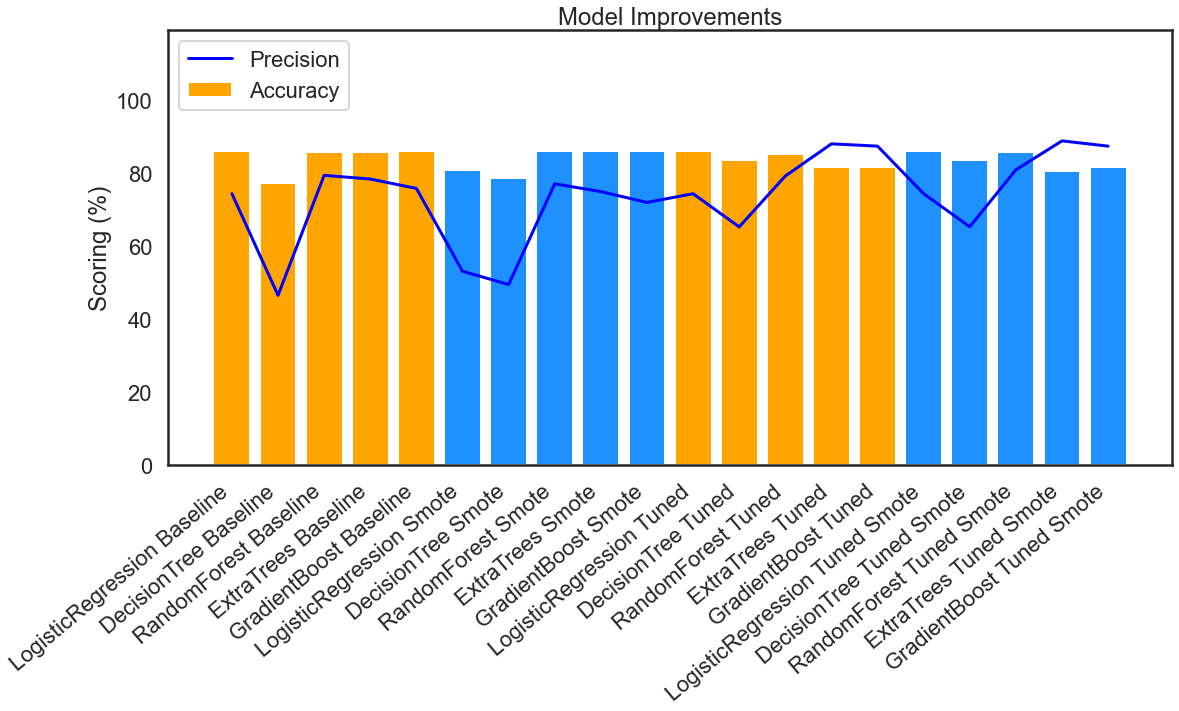

In [39]:
# Plot the Precision and Accuracy metrics of all models
fig, ax = plt.subplots(figsize=(18, 8))

c = ['orange', 'orange', 'orange', 'orange', 'orange', 'dodgerblue', 'dodgerblue', 'dodgerblue', 'dodgerblue', 'dodgerblue', 
     'orange', 'orange', 'orange', 'orange', 'orange', 'dodgerblue', 'dodgerblue', 'dodgerblue', 'dodgerblue', 'dodgerblue']

plt.plot(final_table['Name'], (final_table['Precision'])*100, color='blue', label='Precision')
plt.bar(final_table['Name'], (final_table['Accuracy'])*100, color=c, label='Accuracy')

plt.ylim(0, 119)
plt.grid(False)
plt.xticks(rotation=40, ha='right')
plt.ylabel('Scoring (%)')
plt.title('Model Improvements')
plt.legend(loc="upper left")
plt.show();

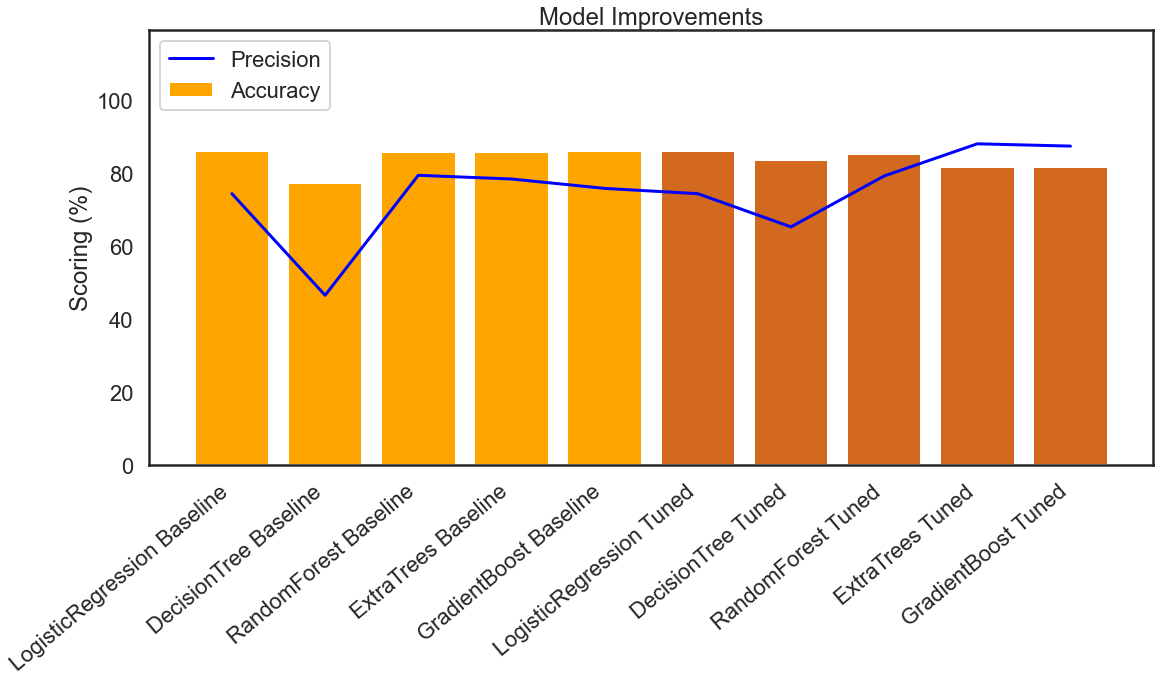

In [40]:
# Plot the Precision and Accuracy improvements of select models
baseline_plot = final_table.iloc[0:5]
tuned_plot = final_table.iloc[10:15]

select_models = pd.concat([baseline_plot, tuned_plot], ignore_index=True)

fig, ax = plt.subplots(figsize=(18, 8))

c = ['orange', 'orange', 'orange', 'orange', 'orange', 'chocolate', 'chocolate', 'chocolate', 'chocolate', 'chocolate']

plt.plot(select_models['Name'], (select_models['Precision'])*100, color='blue', label='Precision')
plt.bar(select_models['Name'], (select_models['Accuracy'])*100, color=c, label='Accuracy')

plt.ylim(0, 119)
plt.grid(False)
plt.xticks(rotation=40, ha='right')
plt.ylabel('Scoring (%)')
plt.title('Model Improvements')
plt.legend(loc="upper left")
ax.get_xaxis().set_visible(True)
plt.show();

# 3. Final Model <a class="anchor" id="Final_Model"></a>

In [41]:
# Run the tuned Extra trees for final model
X_train, X_test, y_train, y_test = data_split()

final_model = tuned_models['ExtraTrees']['classifier']

final_pipe = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", final_model)])

final_pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('grab_num',
                                                                   FunctionTransformer(func=<function grab_numeric at 0x7fb59f7724c0>)),
                                                                  ('num_impute',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                           

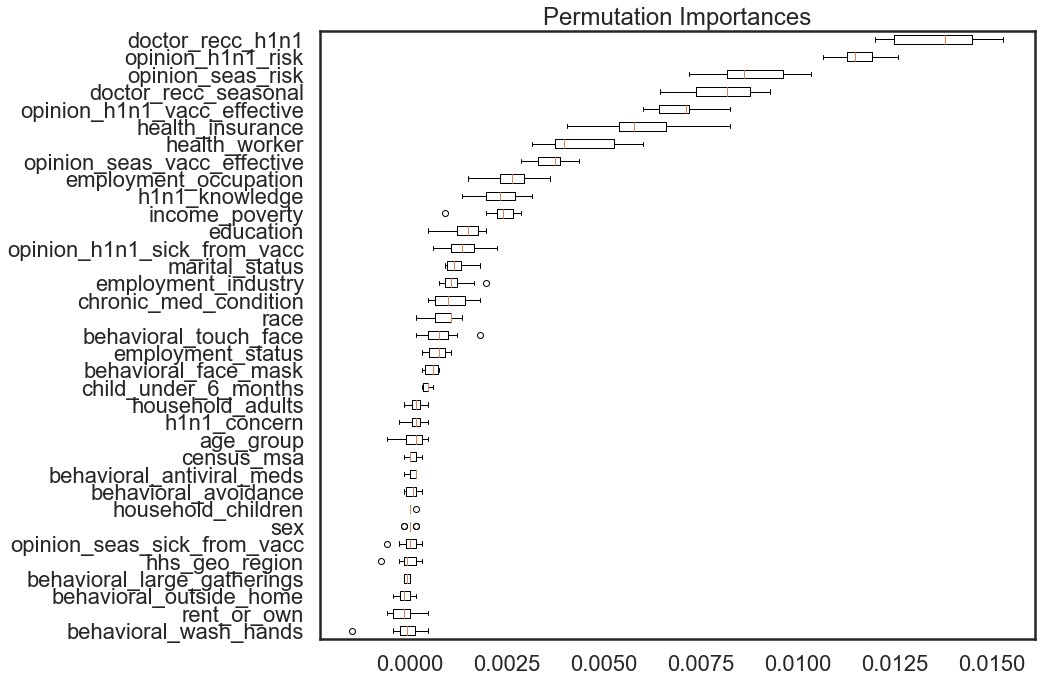

In [46]:
# Show the most important features of the model
result = permutation_importance(final_pipe, X_test, y_test, n_repeats=10, random_state=20211122, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(15, 10))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])

ax.set_title("Permutation Importances")
fig.tight_layout()
plt.show()

In [44]:
# Create a table of all features and the mean importances
perm_features = pd.DataFrame(dict(feature_names=X_test.columns.tolist(),
                                  feat_imp=result.importances_mean))

# Display table according to highest importance
perm_features.sort_values('feat_imp', ascending=False)

feature_names  feat_imp
9              doctor_recc_h1n1  0.013539
16            opinion_h1n1_risk  0.011562
19            opinion_seas_risk  0.008746
10         doctor_recc_seasonal  0.008043
15  opinion_h1n1_vacc_effective  0.006979
14             health_insurance  0.006021
13                health_worker  0.004388
18  opinion_seas_vacc_effective  0.003594
34        employment_occupation  0.002651
1                h1n1_knowledge  0.002321
25               income_poverty  0.002291
22                    education  0.001393
17  opinion_h1n1_sick_from_vacc  0.001378
26               marital_status  0.001198
33          employment_industry  0.001138
11        chronic_med_condition  0.001063
23                         race  0.000899
8         behavioral_touch_face  0.000779
28            employment_status  0.000704
4          behavioral_face_mask  0.000554
12         child_under_6_months  0.000434
31             household_adults  0.000150
0                  h1n1_concern  0.000135
21                    age_group  0.000075
30                   census_msa  0.000075
2     behavioral_antiviral_meds  0.000075
3          behavioral_avoidance  0.000045
32           household_children  0.000015
24                          sex  0.000000
20  opinion_seas_sick_from_vacc -0.000030
29               hhs_geo_region -0.000060
6   behavioral_large_gatherings -0.000075
7       behavioral_outside_home -0.000135
27                  rent_or_own -0.000165
5         behavioral_wash_hands -0.000180

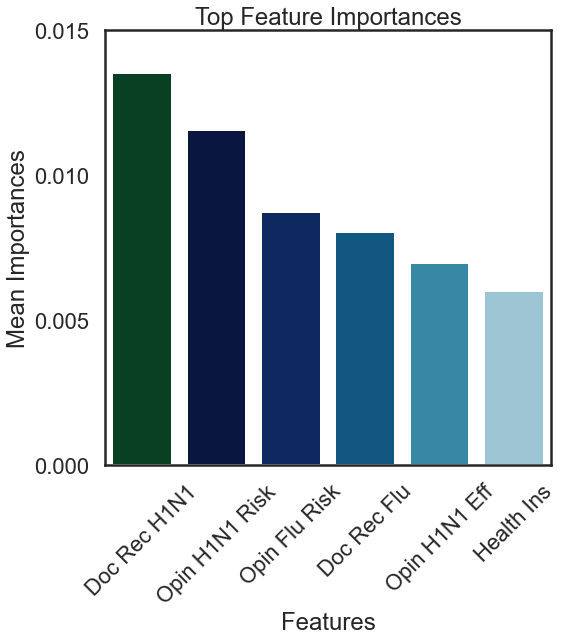

In [64]:
# Graph the most important features
top_features = perm_features.sort_values('feat_imp', ascending=False)[0:6]
top_names = ['Doc Rec H1N1', 'Opin H1N1 Risk', 'Opin Flu Risk', 'Doc Rec Flu', 'Opin H1N1 Eff', 'Health Ins']
plt.figure(figsize=(8, 8))

ax = sns.barplot(x='feature_names', y='feat_imp', data=top_features, palette='ocean')
ax.set_xlabel('Features')
ax.set_ylabel('Mean Importances')
ax.set_title('Top Feature Importances')
plt.xticks(range(len(top_names)), top_names, rotation=45, ha='center')
plt.yticks(np.arange(0, 0.016, step=0.005))
plt.show()

# 4. Test Evaluation <a class="anchor" id="Test_valuation"></a>

In [65]:
# Run final model on the test set and print metrics
final_pred = final_pipe.predict(X_test)

print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, final_pred), 4)}.
Our final model's recall on the test set is {round(recall_score(y_test, final_pred), 4)}.
Our final model's precision on the test set is {round(precision_score(y_test, final_pred), 4)}.
Our final model's f1-score on the test is {round(f1_score(y_test, final_pred), 4)}.
""")


Our final model's accuracy on the test set is 0.8071.
Our final model's recall on the test set is 0.1064.
Our final model's precision on the test set is 0.883.
Our final model's f1-score on the test is 0.1899.



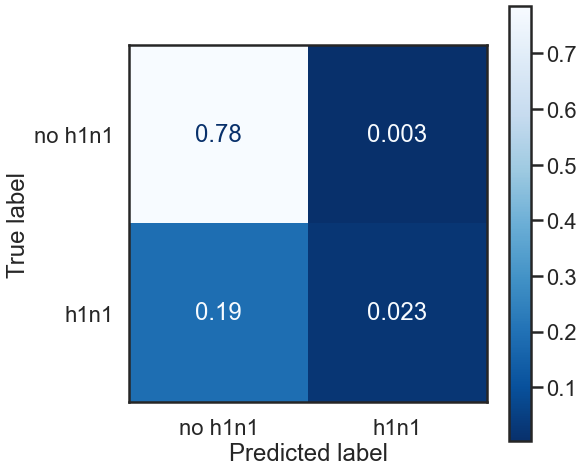

In [68]:
# Plot the confusion matrix of final model results
fig, ax = plt.subplots(figsize=(8, 8))
plot_confusion_matrix(final_pipe, X_test, y_test, cmap='Blues_r',
                      display_labels=['NO H1N1', 'H1N1'], ax=ax, normalize='all')
plt.title('Baseline Model Confusion Matrix')
plt.grid(False)
plt.show()

# 5. Results <a class="anchor" id="Results"></a>
With our final model, we improved the ability to predict vaccination status by increasing precision from 75% to **90%**. We can now better predict when someone actually has not received the H1N1 vaccine. Further, this model provided insights on key features related to vaccination status.

Using this model, plus insights from the important features, the NYC Health Department can target these individuals in their vaccination efforts.

Our model provides great inference and predicts substantially better than the baseline, but there is room for improvement. We will need up-to-date data from the most recent pandemic and flu season. We are confident that our model could be used to predict the vaccination status of the next flu season, especially given the exclusive online application we designed for the NYC Health Department.
## Online Application
Describe online app
![Web App](images/web_app.png)

# 6. Recommendations <a class="anchor" id="Recommendations"></a>
#### 1. PCP Recommendation and Patient Education
  - Primary Care Physician recommends the H1N1 vaccine
  - Primary Care Physician recommends the seasonal flu vaccine
  
#### 2. Increase Awareness of Virus and Vaccine
  - Gear campaign content towards
    - Vaccine effectiveness
    - H1N1 Risk
    - Flu Risk
    
#### 3. Incentivize Uninsured Individuals
  - Provide incentive options for uninsured individuals to get vaccinated.

# Next Steps <a class="anchor" id="Next_Steps"></a>
#### 1. Collect Recent Data
  - The data we used to develop our model was over 10 years old, let us use recent data to better gain insights of the current landscape of vaccination patterns.
  
#### 2. Deploy the Model & Application
  - Use the model to predict who may or may not get the vaccine next flu season.
  - Utilize the online application we created to mass survey individuals.
  - An iterative approach to surveying using the appliction will naturally collect more data which consequently will better our predictions and reveal more insights.

# Contact Us <a class="anchor" id="Contact"></a>

Any inquiries, please contact the contributors to this analysis:   
>[Czarina Luna](https://www.linkedin.com/in/czarinagluna)  
[Justin Sohn](https://www.linkedin.com/in/justin-sohn-689901193/)  
[Weston Shuken](https://www.linkedin.com/in/westonshuken/)